In [ ]:
#| default_exp colors

In [ ]:
#| export
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from fastcore.all import *
from PIL import Image

In [ ]:
img_path = Path('../images/image1.png')
img = Image.open(img_path).convert("RGB")

## 3D color representaion

In [ ]:
#| export
def extract_colors(img):
    arr = np.array(img)/255 # normalize to unit cube
    cols  = arr.reshape(-1, 3)
    return cols.T

<mpl_toolkits.mplot3d.art3d.Path3DCollection>

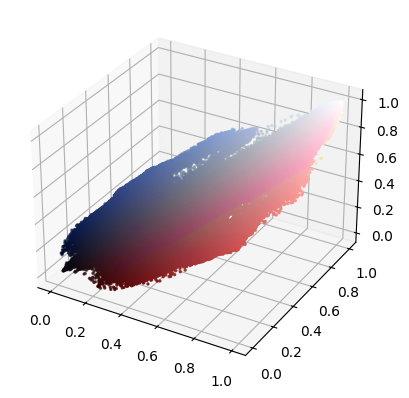

In [ ]:
cols = extract_colors(img)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*cols, c = cols.T, s=2)

In [ ]:
#| export
def scatter_plotly(cols):
    x,y,z = cols
    return go.Figure(data=[go.Scatter3d(x=x,y=y,z=z, mode='markers', marker=dict(size=2, color=cols.T))])

def compress_img(img, scale=256):
    w, h = img.size
    return img.resize((min(scale,w), min(scale,h)))

In [ ]:
scatter_plotly(extract_colors( compress_img(img, 256)))

In [ ]:
from nbdev import export

export.nb_export('colors.ipynb', '.')